The Client

XYZ is a private firm in US. Due to remarkable growth in the Cab Industry in last few years and multiple key players in the market, it is planning for an investment in Cab industry and as per their Go-to-Market(G2M) strategy they want to understand the market before taking final decision.

Project delivery:

You have been provided with multiple data sets that contains information on 2 cab companies. Each file (data set) provided represents different aspects of the customer profile. XYZ is interested in using your actionable insights to help them identify the right company to make their investment.

The outcome of your delivery will be a presentation to XYZ’s Executive team. This presentation will be judged based on the visuals provided, the quality of your analysis and the value of your recommendations and insights. 


## Data Set:

You have been provided 4 individual data sets. Time period of data is from 31/01/2016 to 31/12/2018.

Below are the list of datasets which are provided for the analysis:

Cab_Data.csv– this file includes details of transaction for 2 cab companies

Customer_ID.csv – this is a mapping table that contains a unique identifier which links the customer’s demographic details

Transaction_ID.csv – this is a mapping table that contains transaction to customer mapping and payment mode

City.csv – this file contains list of US cities, their population and number of cab users

You should fully investigate and understand each data set.

Review the Source Documentation
Understand the field names and data types
Identify relationships across the files
Field/feature transformations
Determine which files should be joined versus which ones should be appended
Create master data and explain the relationship
Identify and remove duplicates
Perform other analysis like NA value and outlier detection
 

You are not limited to only utilizing the data you have been provided.

We encourage you to find third party data sets which correspond to the overall theme and geographical properties of the data provided.  For Example: you can leverage US holiday data/ weather data

Also, do research on overall cab industry in US and try to relate that with the trend in data

## Analysis

Create multiple hypothesis and investigate:

Areas to investigate:

- Which company has maximum cab users at a particular time period?
- Does margin proportionally increase with increase in number of customers?
- What are the attributes of these customer segments?


Although not required, we encourage you to document the process and findings

What is the business problem?
What are the properties of the data provided (data intake report)
What steps did you take in order to create an applicable data set?
How did you prepare and perform your analysis?
What type of analysis did you perform?
Why did you choose to use certain analytical techniques over others?
What were the results?
Prepare a presentation that summarizes your analysis and recommendations and identify which company is performing better and is a better investment opportunity for XYZ.

## Importing Data

In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly
import plotly.graph_objects as go

In [2]:
cab_df = pd.read_csv('Data/Cab_Data.csv')

In [3]:
cab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [4]:
cab_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [5]:
city_df = pd.read_csv('Data/City.csv')
city_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [6]:
city_df.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [7]:
customer_df = pd.read_csv('Data/Customer_ID.csv')
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [8]:
customer_df.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [9]:
transaction_df = pd.read_csv('Data/Transaction_ID.csv')
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [10]:
transaction_df.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [11]:
data = cab_df.merge(transaction_df,on= 'Transaction ID').merge(customer_df, on='Customer ID').merge(city_df, on='City')
data

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,"814,885","24,701"
1,10351127,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,"814,885","24,701"
2,10412921,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,"814,885","24,701"
3,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,"814,885","24,701"
4,10320494,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,"814,885","24,701"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10307228,43162,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,51406,Cash,Female,29,6829,"418,859","127,001"
359388,10319775,43203,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,51406,Cash,Female,29,6829,"418,859","127,001"
359389,10347676,43287,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,51406,Card,Female,29,6829,"418,859","127,001"
359390,10358624,43314,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,51406,Cash,Female,29,6829,"418,859","127,001"


## Data Cleaning

In [12]:
data.isna().any()

Transaction ID        False
Date of Travel        False
Company               False
City                  False
KM Travelled          False
Price Charged         False
Cost of Trip          False
Customer ID           False
Payment_Mode          False
Gender                False
Age                   False
Income (USD/Month)    False
Population            False
Users                 False
dtype: bool

In [13]:
data.columns = data.columns.str.replace(' ','_').str.lower()
data.columns

Index(['transaction_id', 'date_of_travel', 'company', 'city', 'km_travelled',
       'price_charged', 'cost_of_trip', 'customer_id', 'payment_mode',
       'gender', 'age', 'income_(usd/month)', 'population', 'users'],
      dtype='object')

In [14]:
# change the type of categorical columns into category datatype 
data['company'] = data['company'].astype('category')
data['city'] = data['city'].astype('category')
data['gender'] = data['gender'].astype('category')
data['payment_mode'] = data['payment_mode'].astype('category')

# change the type of users and population datatype into int64 
data['population'] = data['population'].str.replace(',','')
data['population'] = data['population'].astype('int64')

data['users'] = data['users'].str.replace(',','')
data['users'] = data['users'].astype('int64')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   transaction_id      359392 non-null  int64   
 1   date_of_travel      359392 non-null  int64   
 2   company             359392 non-null  category
 3   city                359392 non-null  category
 4   km_travelled        359392 non-null  float64 
 5   price_charged       359392 non-null  float64 
 6   cost_of_trip        359392 non-null  float64 
 7   customer_id         359392 non-null  int64   
 8   payment_mode        359392 non-null  category
 9   gender              359392 non-null  category
 10  age                 359392 non-null  int64   
 11  income_(usd/month)  359392 non-null  int64   
 12  population          359392 non-null  int64   
 13  users               359392 non-null  int64   
dtypes: category(4), float64(3), int64(7)
memory usage: 31.5 MB


In [15]:
# change the type of Date of Travel datatype into DateTime 
a = data['date_of_travel'].to_list()
base_date = pd.Timestamp('1899-12-29')
dates = [base_date + pd.DateOffset(date_offset) for date_offset in a]
data['date_of_travel'] = pd.to_datetime(dates, format='%y/%m/%d')

In [16]:
data.head()

,transaction_id,date_of_travel,company,city,km_travelled,price_charged,cost_of_trip,customer_id,payment_mode,gender,age,income_(usd/month),population,users
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885,24701
1,10351127,2018-07-20,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885,24701
2,10412921,2018-11-22,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885,24701
3,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885,24701
4,10320494,2018-04-20,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885,24701


In [17]:
data.tail()

,transaction_id,date_of_travel,company,city,km_travelled,price_charged,cost_of_trip,customer_id,payment_mode,gender,age,income_(usd/month),population,users
359387,10307228,2018-03-02,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,51406,Cash,Female,29,6829,418859,127001
359388,10319775,2018-04-12,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,51406,Cash,Female,29,6829,418859,127001
359389,10347676,2018-07-05,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,51406,Card,Female,29,6829,418859,127001
359390,10358624,2018-08-01,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,51406,Cash,Female,29,6829,418859,127001
359391,10370709,2018-08-29,Yellow Cab,WASHINGTON DC,34.24,453.11,427.3152,51406,Card,Female,29,6829,418859,127001


### Feature engineering

In [18]:
data['year'] = data['date_of_travel'].dt.year
data['month'] = data['date_of_travel'].dt.month

data['profit'] = data['price_charged']-data['cost_of_trip']
data['profit_pct'] = ((data['price_charged']-data['cost_of_trip'])/data['cost_of_trip'])*100
data['profit_per_km'] = data['profit']/data['km_travelled']

data['users_ratio'] = data['users']/data['population']*100
data

,transaction_id,date_of_travel,company,city,km_travelled,price_charged,cost_of_trip,customer_id,payment_mode,gender,age,income_(usd/month),population,users,year,month,profit,profit_pct,profit_per_km,users_ratio
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885,24701,2016,1,57.3150,18.274427,1.882266,3.031225
1,10351127,2018-07-20,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885,24701,2018,7,281.2772,88.612790,10.739870,3.031225
2,10412921,2018-11-22,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885,24701,2018,11,194.6480,32.582415,4.574571,3.031225
3,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885,24701,2016,1,23.6660,7.067558,0.826904,3.031225
4,10320494,2018-04-20,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885,24701,2018,4,253.9808,54.371732,6.981330,3.031225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10307228,2018-03-02,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,51406,Cash,Female,29,6829,418859,127001,2018,3,143.6180,27.339562,3.740052,30.320705
359388,10319775,2018-04-12,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,51406,Cash,Female,29,6829,418859,127001,2018,4,23.0464,51.727358,6.455574,30.320705
359389,10347676,2018-07-05,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,51406,Card,Female,29,6829,418859,127001,2018,7,-5.8540,-1.732855,-0.249531,30.320705
359390,10358624,2018-08-01,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,51406,Cash,Female,29,6829,418859,127001,2018,8,-6.0900,-1.671607,-0.220652,30.320705


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   transaction_id      359392 non-null  int64         
 1   date_of_travel      359392 non-null  datetime64[ns]
 2   company             359392 non-null  category      
 3   city                359392 non-null  category      
 4   km_travelled        359392 non-null  float64       
 5   price_charged       359392 non-null  float64       
 6   cost_of_trip        359392 non-null  float64       
 7   customer_id         359392 non-null  int64         
 8   payment_mode        359392 non-null  category      
 9   gender              359392 non-null  category      
 10  age                 359392 non-null  int64         
 11  income_(usd/month)  359392 non-null  int64         
 12  population          359392 non-null  int64         
 13  users               359392 no

# Data Analysis

In [20]:
data.describe()

,transaction_id,km_travelled,price_charged,cost_of_trip,customer_id,age,income_(usd/month),population,users,year,month,profit,profit_pct,profit_per_km,users_ratio
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,22.567254,423.443311,286.190113,19191.652115,35.336705,15048.822937,3.132198e+06,158365.582267,2017.041693,7.509243,137.253198,47.523115,6.083579,10.668662
std,1.268058e+05,12.233526,274.378911,157.993661,21012.412463,12.594234,7969.409482,3.315194e+06,100850.051020,0.801378,3.428929,160.311840,42.571507,5.543493,10.633114
min,1.000001e+07,1.900000,15.600000,19.000000,1.000000,18.000000,2000.000000,2.489680e+05,3643.000000,2016.000000,1.000000,-220.060000,-40.933780,-4.998235,0.649683
25%,1.011081e+07,12.000000,206.437500,151.200000,2705.000000,25.000000,8424.000000,6.712380e+05,80021.000000,2016.000000,5.000000,28.012000,16.084529,2.000385,3.594514
50%,1.022104e+07,22.440000,386.360000,282.480000,7459.000000,33.000000,14685.000000,1.595037e+06,144132.000000,2017.000000,8.000000,81.962000,35.925527,4.466809,7.296413
75%,1.033094e+07,32.960000,583.660000,413.683200,36078.000000,42.000000,21035.000000,8.405837e+06,302149.000000,2018.000000,11.000000,190.030000,71.268038,9.170006,9.036279
max,1.044011e+07,48.000000,2048.030000,691.200000,60000.000000,65.000000,35000.000000,8.405837e+06,302149.000000,2018.000000,12.000000,1463.966000,320.214607,41.115556,32.141078


In [21]:
from sklearn.preprocessing import LabelEncoder
new_df = data.drop(['transaction_id', 'customer_id'], axis=1)
le = LabelEncoder()
new_df["gender"] = le.fit_transform(new_df["gender"])
new_df["city"] = le.fit_transform(new_df["city"])
new_df["payment_mode"] = le.fit_transform(new_df["payment_mode"])

pink_data = new_df[new_df['company'] == 'Pink Cab'] 
yellow_data = new_df[new_df['company'] == 'Yellow Cab']

new_df["company"] = le.fit_transform(new_df["company"])
new_df

,date_of_travel,company,city,km_travelled,price_charged,cost_of_trip,payment_mode,gender,age,income_(usd/month),population,users,year,month,profit,profit_pct,profit_per_km,users_ratio
0,2016-01-07,0,0,30.45,370.95,313.6350,0,1,28,10813,814885,24701,2016,1,57.3150,18.274427,1.882266,3.031225
1,2018-07-20,1,0,26.19,598.70,317.4228,1,1,28,10813,814885,24701,2018,7,281.2772,88.612790,10.739870,3.031225
2,2018-11-22,1,0,42.55,792.05,597.4020,0,1,28,10813,814885,24701,2018,11,194.6480,32.582415,4.574571,3.031225
3,2016-01-05,0,0,28.62,358.52,334.8540,0,1,27,9237,814885,24701,2016,1,23.6660,7.067558,0.826904,3.031225
4,2018-04-20,1,0,36.38,721.10,467.1192,0,1,27,9237,814885,24701,2018,4,253.9808,54.371732,6.981330,3.031225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,2018-03-02,1,18,38.40,668.93,525.3120,1,0,29,6829,418859,127001,2018,3,143.6180,27.339562,3.740052,30.320705
359388,2018-04-12,1,18,3.57,67.60,44.5536,1,0,29,6829,418859,127001,2018,4,23.0464,51.727358,6.455574,30.320705
359389,2018-07-05,1,18,23.46,331.97,337.8240,0,0,29,6829,418859,127001,2018,7,-5.8540,-1.732855,-0.249531,30.320705
359390,2018-08-01,1,18,27.60,358.23,364.3200,1,0,29,6829,418859,127001,2018,8,-6.0900,-1.671607,-0.220652,30.320705


### Correlation Matrix

<AxesSubplot:>

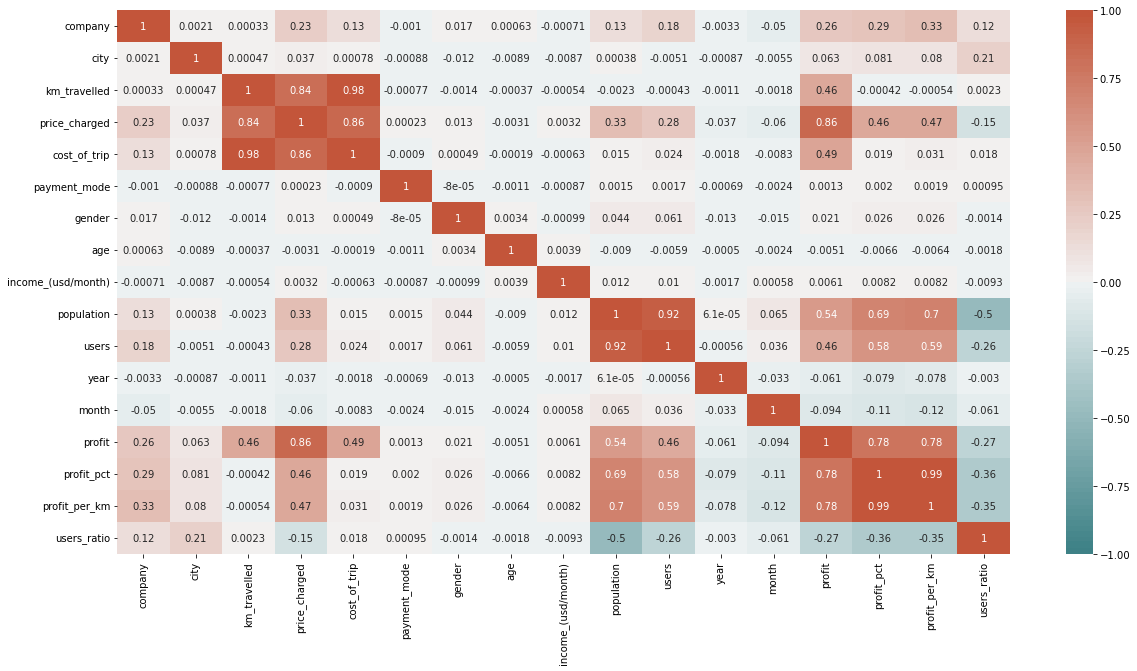

In [22]:
corr = new_df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, center=0, 
            cmap=sns.diverging_palette(200, 20, n=100))

#### Abvoe heatmaps tell us some intuitive truth.
#### Price_Charged is positively related to profit indexes, i.e., Profit, Profit_Rate, Profit_per_KM. 
#### Now we can take more detail look at correlation between each company and othe feature. MAybe that can provide us more insights


In [23]:
pink_data

,date_of_travel,company,city,km_travelled,price_charged,cost_of_trip,payment_mode,gender,age,income_(usd/month),population,users,year,month,profit,profit_pct,profit_per_km,users_ratio
0,2016-01-07,Pink Cab,0,30.45,370.95,313.635,0,1,28,10813,814885,24701,2016,1,57.315,18.274427,1.882266,3.031225
3,2016-01-05,Pink Cab,0,28.62,358.52,334.854,0,1,27,9237,814885,24701,2016,1,23.666,7.067558,0.826904,3.031225
6,2018-10-26,Pink Cab,0,13.39,167.03,141.934,0,1,27,9237,814885,24701,2018,10,25.096,17.681458,1.874235,3.031225
7,2016-01-01,Pink Cab,0,9.04,125.20,97.632,1,1,53,11242,814885,24701,2016,1,27.568,28.236644,3.049558,3.031225
11,2016-01-06,Pink Cab,0,33.17,377.40,351.602,1,1,23,23327,814885,24701,2016,1,25.798,7.337273,0.777751,3.031225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359332,2017-07-22,Pink Cab,18,20.23,347.58,218.484,1,1,58,10737,418859,127001,2017,7,129.096,59.087164,6.381414,30.320705
359346,2017-11-18,Pink Cab,18,4.44,61.95,50.616,0,1,39,15247,418859,127001,2017,11,11.334,22.392129,2.552703,30.320705
359356,2018-12-01,Pink Cab,18,40.95,565.07,434.070,0,1,39,15247,418859,127001,2018,12,131.000,30.179464,3.199023,30.320705
359358,2017-07-22,Pink Cab,18,32.64,375.27,368.832,0,0,18,6855,418859,127001,2017,7,6.438,1.745510,0.197243,30.320705


<AxesSubplot:>

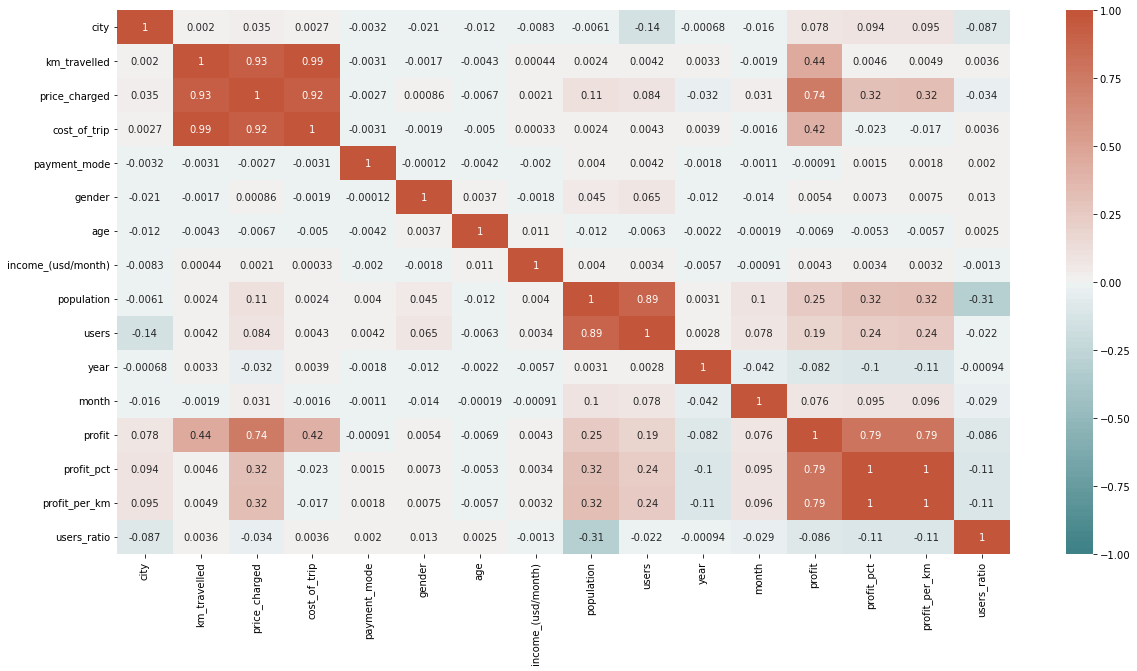

In [24]:
corr = pink_data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, center=0, 
            cmap=sns.diverging_palette(200, 20, n=100))

<AxesSubplot:>

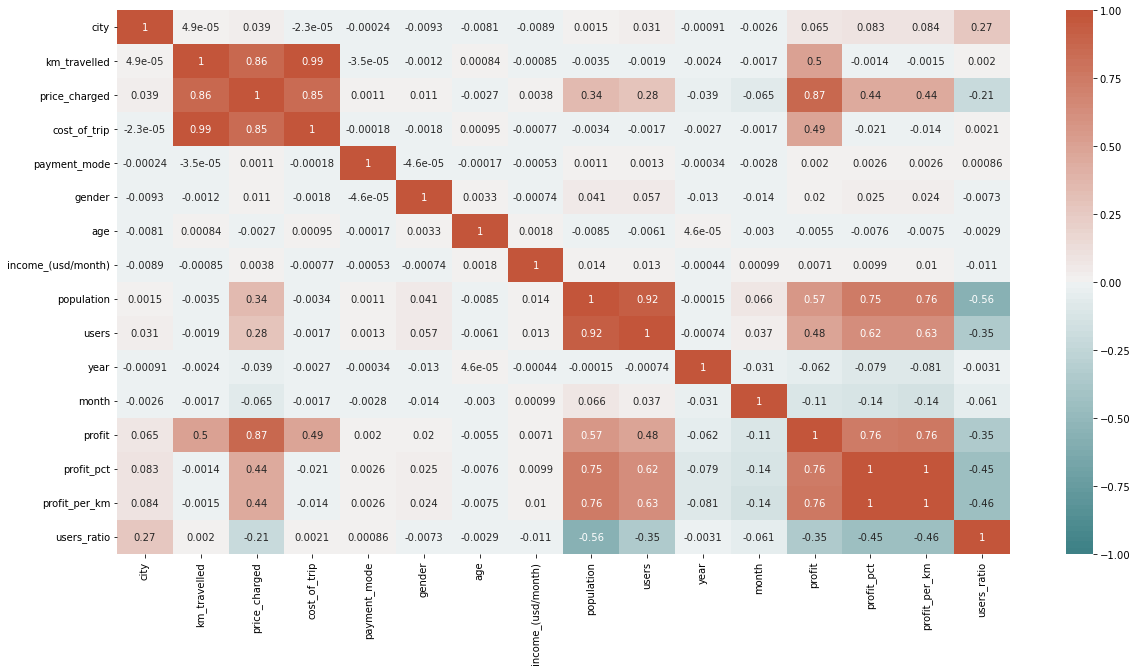

In [25]:
corr = yellow_data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, center=0, 
            cmap=sns.diverging_palette(200, 20, n=100))

#### Aboce two heatmaps for Pink Cab and Yellow Cab also tell us same intuitive truth. However, we also find that the correlations between Population, Users and profit indexes of Yellow Cab is bit higher than those of Pink Cab. 

In [26]:
new_df.describe()

,company,city,km_travelled,price_charged,cost_of_trip,payment_mode,gender,age,income_(usd/month),population,users,year,month,profit,profit_pct,profit_per_km,users_ratio
count,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000
mean,0.764294,8.375267,22.567254,423.443311,286.190113,0.400365,0.572945,35.336705,15048.822937,3.132198e+06,158365.582267,2017.041693,7.509243,137.253198,47.523115,6.083579,10.668662
std,0.424440,5.254335,12.233526,274.378911,157.993661,0.489973,0.494651,12.594234,7969.409482,3.315194e+06,100850.051020,0.801378,3.428929,160.311840,42.571507,5.543493,10.633114
min,0.000000,0.000000,1.900000,15.600000,19.000000,0.000000,0.000000,18.000000,2000.000000,2.489680e+05,3643.000000,2016.000000,1.000000,-220.060000,-40.933780,-4.998235,0.649683
25%,1.000000,3.000000,12.000000,206.437500,151.200000,0.000000,0.000000,25.000000,8424.000000,6.712380e+05,80021.000000,2016.000000,5.000000,28.012000,16.084529,2.000385,3.594514
50%,1.000000,9.000000,22.440000,386.360000,282.480000,0.000000,1.000000,33.000000,14685.000000,1.595037e+06,144132.000000,2017.000000,8.000000,81.962000,35.925527,4.466809,7.296413
75%,1.000000,10.000000,32.960000,583.660000,413.683200,1.000000,1.000000,42.000000,21035.000000,8.405837e+06,302149.000000,2018.000000,11.000000,190.030000,71.268038,9.170006,9.036279
max,1.000000,18.000000,48.000000,2048.030000,691.200000,1.000000,1.000000,65.000000,35000.000000,8.405837e+06,302149.000000,2018.000000,12.000000,1463.966000,320.214607,41.115556,32.141078


Max price_charged seems higher than max cost of trip so we can look if there are any outliers there.

In [27]:
yellow_data.describe()

,city,km_travelled,price_charged,cost_of_trip,payment_mode,gender,age,income_(usd/month),population,users,year,month,profit,profit_pct,profit_per_km,users_ratio
count,274681.000000,274681.000000,274681.000000,274681.000000,274681.000000,274681.000000,274681.000000,274681.000000,2.746810e+05,274681.000000,274681.000000,274681.000000,274681.000000,274681.000000,274681.000000,274681.000000
mean,8.381421,22.569517,458.181990,297.922004,0.400086,0.577692,35.341112,15045.669817,3.373228e+06,168473.246981,2017.040221,7.414579,160.259986,54.296623,7.105508,11.366561
std,5.371240,12.234298,288.386166,162.548986,0.489916,0.493928,12.578625,7962.727062,3.439014e+06,100570.558886,0.801551,3.454863,171.823833,44.548021,5.790791,11.149857
min,0.000000,1.900000,20.730000,22.800000,0.000000,0.000000,18.000000,2000.000000,2.489680e+05,3643.000000,2016.000000,1.000000,-176.930800,-35.298272,-4.998235,0.649683
25%,3.000000,11.990000,226.680000,158.400000,0.000000,0.000000,25.000000,8439.000000,6.712380e+05,80021.000000,2016.000000,5.000000,37.180000,19.680294,2.601667,3.594514
50%,9.000000,22.440000,425.060000,295.596000,0.000000,1.000000,33.000000,14676.000000,1.595037e+06,144132.000000,2017.000000,8.000000,102.000000,42.839856,5.601623,8.412126
75%,9.000000,32.960000,633.880000,432.432000,1.000000,1.000000,42.000000,21023.000000,8.405837e+06,302149.000000,2018.000000,10.000000,228.670400,82.690329,10.889670,9.036279
max,18.000000,48.000000,2048.030000,691.200000,1.000000,1.000000,65.000000,34996.000000,8.405837e+06,302149.000000,2018.000000,12.000000,1463.966000,320.214607,41.115556,32.141078


### Compare Yellow Cab and Pink Cab from Different Aspects

In this section , we compare the data of Yellow Cab and Pink Cab to answer the following questions.

- What's the profit rate of Cab market? Which company has higher profit rate?

- Does Yellow Cab have bigger market share than Pink Cab?

- Do Customers prefer Yellow Cab to Pink Cab?

- Who serves the higher income

- Which company prevail in which city?

- Can Yellow Cab make more profit in the future?

#### What's the profit rate of Cab market? Which company has higher profit rate?

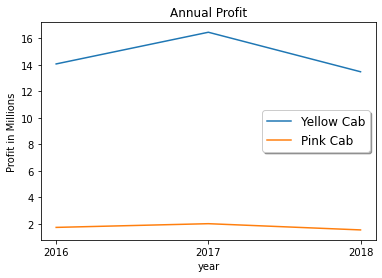

In [28]:
year = [2016,2017,2018]
yellow_cab_profit=[]
pink_cab_profit=[]

for i in range(len(year)):
    profit = round ( data[(data['year'] == year[i]) & (data.company == "Yellow Cab")]["profit"].sum()/1000000 ,2) 
    yellow_cab_profit.append(profit)
    
for i in range(len(year)):
    profit = round ( data[(data['year'] == year[i]) & (data.company == "Pink Cab")]["profit"].sum()/1000000 ,2) 
    pink_cab_profit.append(profit)

year = ['2016','2017','2018']
plt.xlabel('year')
plt.ylabel('Profit in Millions')
plt.title('Annual Profit')

plt.plot(year,yellow_cab_profit,label = 'Yellow Cab')
plt.plot(year,pink_cab_profit,label = 'Pink Cab')
plt.legend(loc='best',shadow=True, fontsize = 'large')

plt.show()

Bot the cabs profit increased from 2016 to 2017 and reduced from 2017 to 2018. But still Yellow cab made significantly more profit than Pink cab. But we still need to look into annual profit rate to understand it better.

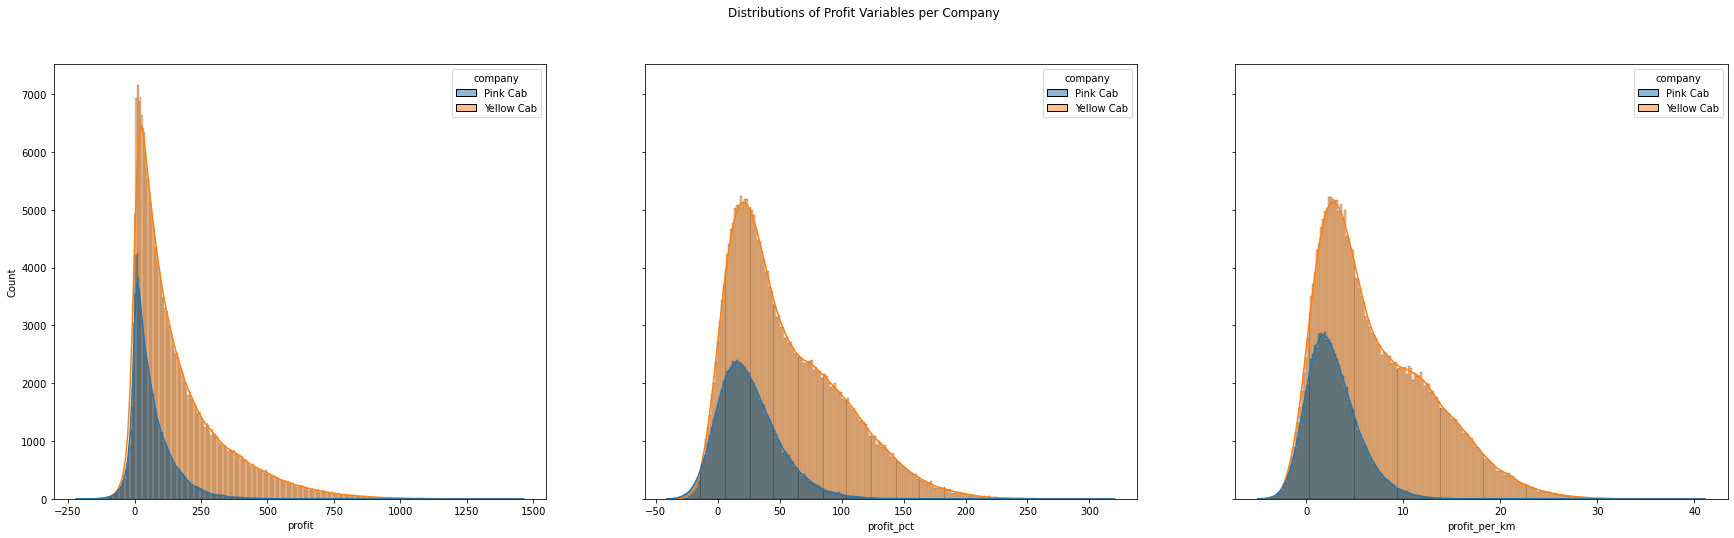

In [29]:
col = ['profit', 'profit_pct', 'profit_per_km']
fig,axes = plt.subplots(1, 3 , figsize=(30,8), sharey=True)
fig.suptitle('Distributions of Profit Variables per Company')

for i in range(len(col)):
    sns.histplot(ax=axes[i], data=data , x=col[i] , kde = True , hue="company")


From above histograms we can see that distributions of profits are all right skewed. But Yellow Cab has a visible bump to the right of peak in the distribution of Percentage Profit and Profit per KM, which may lead to higher total profit rate. 

So lets check company's profit rate next.

Annual Profit Rate
company   Pink Cab  Yellow Cab
year                          
2016     27.854227   56.841811
2017     26.812112   56.542007
2018     21.385401   48.228080


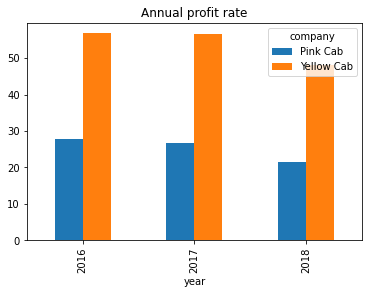

In [30]:
Annual_profit_rate = data.groupby(['year','company']).profit.sum().unstack()/data.groupby(['year','company']).cost_of_trip.sum().unstack()*100
print("Annual Profit Rate")
print(Annual_profit_rate)

ax = Annual_profit_rate.plot(kind='bar', stacked=False, title = 'Annual profit rate')
plt.show()

Yellow Cab does have higher yearly profit rate (48% - 56%) than Pink Cab(21%-27%) in each of the recorded year. And one of the reasons is Yellow Cab have more high-profit-rate rides proportionally than Pink Cab. From this point of view, we think Yellow Cab is more efficient, but we still need to mine deeper into the data for an overall investment recommendation.

company  Pink Cab  Yellow Cab
year                         
2016     3.062027    7.503564
2017     2.949786    7.465487
2018     2.353015    6.364322


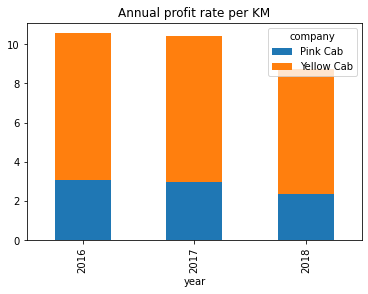

In [31]:
Annual_profit_per_km = data.groupby(['year','company']).profit.sum().unstack()/data.groupby(['year','company']).km_travelled.sum().unstack()
print(Annual_profit_per_km)

ax = Annual_profit_per_km.plot(kind='bar', stacked=True, title = 'Annual profit rate per KM')
plt.show()

Yellow Cab have higher yearly profit rate per KM than Pink Cab in each of the recorded year too. Its more than double to that of Pink cab.

In [32]:
profit_per_ride =pd.DataFrame(data.groupby('company').profit.sum()/data['company'].value_counts())
profit_per_ride.reset_index(inplace=True)
profit_per_ride.columns = ['company','profit_per_ride']
profit_per_ride


,company,profit_per_ride
0,Pink Cab,62.652174
1,Yellow Cab,160.259986


### From all above graphs we can say that Yellow cab is more profitable than pink cab.

But lets check is it caused by location?


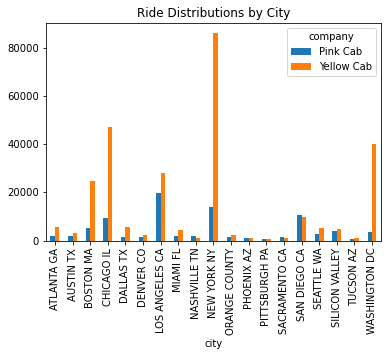

In [33]:
Rides_by_city = data.groupby(['city','company']).transaction_id.count().unstack()
ax = Rides_by_city.plot(kind='bar', stacked=False, title = 'Ride Distributions by City')
plt.show()

As seen from this Bar Chart; For the Yellow Cab Company, the highest number of users on a city basis are in New York,Chicago and Washington DC, while for the Pink Cab Company, the most are in Los Angeles, New York and San Diego.
Also Nashville, Phoenix, Pittsburgh sacramento, San Diego have more Pink Cab rides than yellow cabs, but we nned to check if that affects the profit rate for companies by city.

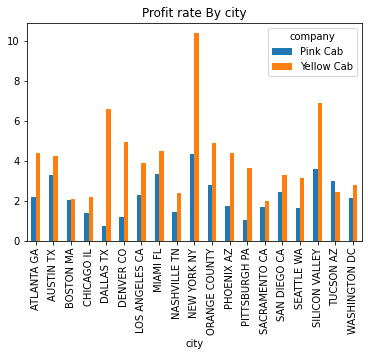

In [34]:
profit_rate_by_city = data.groupby(['city','company']).profit.sum().unstack()/data.groupby(['city','company']).cost_of_trip.sum().unstack()*10
ax = profit_rate_by_city.plot(kind='bar', stacked=False, title = 'Profit rate By city')
plt.show()

Above bar chart indicates citywise profit rate for Yellow cab is still higher than Pink cab except only one city, Tuscon AZ.

Now lets Analyze customer base for both the companies

In [59]:
gender_count = data.groupby('gender').count()
fig1 = px.pie(gender_count,
              values=gender_count.users,
              names=gender_count.index,
              title="Total Users Overview by Gender")
fig1.update_traces(textposition='inside',textinfo='percent+label')
fig1.update_layout( width = 400 , height = 400)

In [63]:
pink_cab_users = data[data['company'] == "Pink Cab"].groupby('gender').count()
yellow_Cab_users = data[data['company'] == "Yellow Cab"].groupby('gender').count()

fig = go.Figure()
fig.add_trace(go.Bar(
                    x=pink_cab_users.index,
                    y=pink_cab_users['users'],
                    name='Pink Cab',
                    marker_color='pink' 
                    ))            
fig.add_trace(go.Bar(
                    x=yellow_Cab_users.index,
                    y=yellow_Cab_users['users'],
                    name='Yellow Cab',
                    marker_color='orange'
                    ))
fig.update_layout(
    yaxis_title="Users",
    title="Pink & Yellow Cab Firm Users Distribution Over Gender" )

In [112]:
#Gender wise customerbase per cab per year
df = data.groupby(['year','gender','company']).customer_id.count()
df

year  gender  company   
2016  Female  Pink Cab      10965
              Yellow Cab    34161
      Male    Pink Cab      14320
              Yellow Cab    48776
2017  Female  Pink Cab      13416
              Yellow Cab    41603
      Male    Pink Cab      16789
              Yellow Cab    56156
2018  Female  Pink Cab      13099
              Yellow Cab    40236
      Male    Pink Cab      16122
              Yellow Cab    53749
Name: customer_id, dtype: int64

In [154]:
df = pd.DataFrame(data.groupby(['year','gender','company']).customer_id.count()).reset_index()

In [155]:
df

,year,gender,company,customer_id
0,2016,Female,Pink Cab,10965
1,2016,Female,Yellow Cab,34161
2,2016,Male,Pink Cab,14320
3,2016,Male,Yellow Cab,48776
4,2017,Female,Pink Cab,13416
5,2017,Female,Yellow Cab,41603
6,2017,Male,Pink Cab,16789
7,2017,Male,Yellow Cab,56156
8,2018,Female,Pink Cab,13099
9,2018,Female,Yellow Cab,40236


In [156]:
yellowcab= df[df['company'] == 'Yellow Cab']
yellowcab

,year,gender,company,customer_id
1,2016,Female,Yellow Cab,34161
3,2016,Male,Yellow Cab,48776
5,2017,Female,Yellow Cab,41603
7,2017,Male,Yellow Cab,56156
9,2018,Female,Yellow Cab,40236
11,2018,Male,Yellow Cab,53749


In [157]:
pinkcab= df[df['company'] == 'Pink Cab']
pinkcab

,year,gender,company,customer_id
0,2016,Female,Pink Cab,10965
2,2016,Male,Pink Cab,14320
4,2017,Female,Pink Cab,13416
6,2017,Male,Pink Cab,16789
8,2018,Female,Pink Cab,13099
10,2018,Male,Pink Cab,16122


In [172]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=yellowcab['year'],
    y=yellowcab['customer_id'],
    name='Yellow Cab',
    marker_color='goldenrod',
    text = yellowcab['gender'],
))
fig.add_trace(go.Bar(
    x=pinkcab['year'],
    y=pinkcab['customer_id'],
    name='Pink Cab',
    marker_color='lightsalmon',
    text = pinkcab['gender']
))
fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(
    title='Customer base per yer per Cab Company',
    xaxis_tickfont_size=14,
    yaxis_tickfont_size=14,
    
    barmode='group',
    bargap=0.15, # gap between bars of adjacent location coordinates.
    bargroupgap=0.1 # gap between bars of the same location coordinate.
)
fig.show()

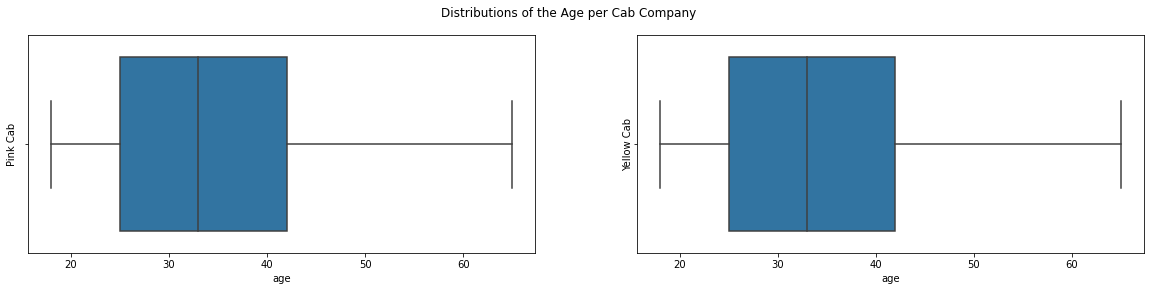

In [182]:
fig,axes = plt.subplots(1, 2, figsize=(20, 4), sharey=True)
fig.suptitle('Age Distributions of customers per Cab Company')
sns.boxplot(ax=axes[0], x='age' , data=pink_data ).set_ylabel("Pink Cab")
sns.boxplot(ax=axes[1], x='age' , data=yellow_data ).set_ylabel("Yellow Cab")
plt.show()

Boxplot for customers age distribution for both cabs company looks same.

In [200]:
df = pd.DataFrame(data.groupby(['year','age','company']).transaction_id.count()).reset_index()
yellowcab= df[df['company'] == 'Yellow Cab']
pinkcab= df[df['company'] == 'Pink Cab']

fig = go.Figure()
fig.add_trace(go.Box(
    x=yellowcab['age'],
    y=yellowcab['year'],
    name='Yellow Cab',
    marker_color='goldenrod'
))
fig.add_trace(go.Box(
     x=pinkcab['age'],
    y=pinkcab['year'],
    name='Pink Cab',
    marker_color='lightsalmon'
))

fig.update_layout(
    title='Customer base age distribution per yer per Cab Company',
    xaxis=dict(title='Age', zeroline=False),
    yaxis=dict(title='year', zeroline=False),
    boxmode='group'
)

fig.update_traces(orientation='h') # horizontal box plots
fig.show()

The customers for both cab companies range from 18 years to 65 years. Boxplot also tells that there is equal distribution for cutomers age utilizing cab ompanies.

In [ ]:
fig,axes = plt.subplots(1, 2, figsize=(20, 4), sharey=True)
fig.suptitle('Distributions of the Age per Cab Company')
sns.boxplot(ax=axes[0,1], x='Income_(USD/Month)' ,          data=Pink_Data ).set_ylabel("Pink Cab")
sns.boxplot(ax=axes[1,1], x='Income_(USD/Month)' ,          data=Yellow_Data ).set_ylabel("Yellow Cab")

In [35]:
data['profit'].unique()

array([ 57.315 , 281.2772, 194.648 , ...,  -5.854 ,  -6.09  ,  25.7948])

In [36]:
profitable_rides = data[data.profit>0]

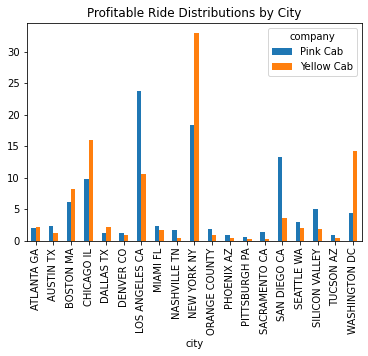

In [44]:
profitable_rides_by_city = profitable_rides.groupby(['city','company']).transaction_id.count().unstack()/profitable_rides.groupby(['company']).transaction_id.count()*100
ax = profitable_rides_by_city.plot(kind='bar', stacked=False, title = 'Profitable Ride Distributions by City')
plt.show()

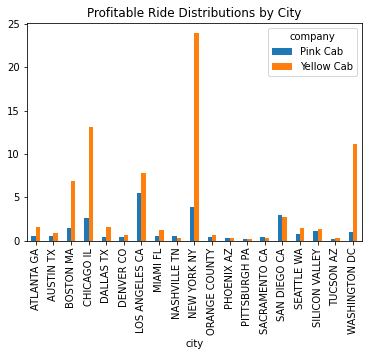

In [46]:
rides_pct_by_city = data.groupby(['city','company']).transaction_id.count().unstack()/data.transaction_id.count()*100
ax = rides_pct_by_city.plot(kind='bar', stacked=False, title = 'Percentage Ride Distributions by City')
plt.show()